# 2.서울시 행정동별 지하철 총 승차 승객수 정보

In [3]:
import requests
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## 행정동별 지하철 총 승차 승객수 > 데이터 가져오기
- 1000페이지씩 전체 데이터 가져오기
- 최종 데이터 combined_df 에 저장

In [4]:
base_url = "http://openapi.seoul.go.kr:8088/5550617970727330313031466c665275/json/tpssSubwayPassenger/"
items_per_page = 1000
total_pages = None
data_frames = []

for i in range(1, 1001):  # Adjust the range according to your needs
    start_page = (i - 1) * items_per_page + 1
    end_page = i * items_per_page
    url = f"{base_url}{start_page}/{end_page}/"
    
    response = requests.get(url)
    data = response.json()

    # Check if the retrieved data is empty
    items = data.get('tpssSubwayPassenger', {}).get('row', [])
    if not items:
        break
    
    df = pd.DataFrame(items)
    data_frames.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

# Now you have a single DataFrame containing data from all pages
print(combined_df)


         CRTR_DT ADMDONG_ID  SBWY_PSGR_CNT  SBWY_PSGR_CNT_00HH  \
0       20230823    1104067            0.0                 0.0   
1       20230823    1124065            0.0                 0.0   
2       20230823    1121079            0.0                 0.0   
3       20230823    1119054       103559.0               195.0   
4       20230823    1115066        10101.0                16.0   
...          ...        ...            ...                 ...   
255243  20211130    1116059            0.0                 0.0   
255244  20211130    1116064        31944.0                 1.0   
255245  20211130    1116065            0.0                 0.0   
255246  20211130    1116067        14445.0                 0.0   
255247  20211130    1116070        12226.0                 1.0   

        SBWY_PSGR_CNT_01HH  SBWY_PSGR_CNT_02HH  SBWY_PSGR_CNT_03HH  \
0                      0.0                 0.0                 0.0   
1                      0.0                 0.0                 0.0 

## 행정동 - 코드 매칭 데이터 불러오기

In [5]:
base_url = "http://openapi.seoul.go.kr:8088/57756f69527273303830644c4b4c6f/json/districtEmd/"
items_per_page = 1000
total_pages = None
data_frames = []

for i in range(1, 1001):  # Adjust the range according to your needs
    start_page = (i - 1) * items_per_page + 1
    end_page = i * items_per_page
    url = f"{base_url}{start_page}/{end_page}/"
    
    response = requests.get(url)
    data = response.json()

    # Check if the retrieved data is empty
    items = data.get('districtEmd', {}).get('row', [])
    if not items:
        break
    
    df = pd.DataFrame(items)
    data_frames.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_dong = pd.concat(data_frames, ignore_index=True)

# Now you have a single DataFrame containing data from all pages
print(combined_dong)


     ADMDONG_ID ADMDONG_NM ATDRC_NM SIDO_NM
0       1101053        사직동      종로구      서울
1       1101054        삼청동      종로구      서울
2       1101055        부암동      종로구      서울
3       1101056        평창동      종로구      서울
4       1101057        무악동      종로구      서울
...         ...        ...      ...     ...
1131    3138037        청운면      양평군     경기도
1132    3138038        양동면      양평군     경기도
1133    3138039        지평면      양평군     경기도
1134    3138040        용문면      양평군     경기도
1135    3138041        개군면      양평군     경기도

[1136 rows x 4 columns]


### 두 데이터 합치기 & 데이터 정제
- 컬럼명, 순서 변경
- 날짜 컬럼 타입 변경(Datetime)
- 불필요한 컬럼 제거

In [36]:
subway_dong = pd.merge(combined_df, combined_dong, on = 'ADMDONG_ID', how = 'left')

In [37]:
subway_dong.head()

,CRTR_DT,ADMDONG_ID,SBWY_PSGR_CNT,SBWY_PSGR_CNT_00HH,SBWY_PSGR_CNT_01HH,SBWY_PSGR_CNT_02HH,SBWY_PSGR_CNT_03HH,SBWY_PSGR_CNT_04HH,SBWY_PSGR_CNT_05HH,SBWY_PSGR_CNT_06HH,...,SBWY_PSGR_CNT_17HH,SBWY_PSGR_CNT_18HH,SBWY_PSGR_CNT_19HH,SBWY_PSGR_CNT_20HH,SBWY_PSGR_CNT_21HH,SBWY_PSGR_CNT_22HH,SBWY_PSGR_CNT_23HH,ADMDONG_NM,ATDRC_NM,SIDO_NM
0,20230823,1104067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,성수2가1동,성동구,서울
1,20230823,1124065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,가락본동,송파구,서울
2,20230823,1121079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,성현동,관악구,서울
3,20230823,1119054,103559.0,195.0,0.0,0.0,0.0,0.0,311.0,611.0,...,20159.0,24448.0,9092.0,7425.0,5911.0,3321.0,1256.0,여의동,영등포구,서울
4,20230823,1115066,10101.0,16.0,0.0,0.0,0.0,2.0,327.0,750.0,...,367.0,379.0,251.0,178.0,149.0,121.0,48.0,신정3동,양천구,서울


In [38]:
subway_dong.drop('ADMDONG_ID', axis = 1, inplace = True)

In [39]:
subway_dong

,CRTR_DT,SBWY_PSGR_CNT,SBWY_PSGR_CNT_00HH,SBWY_PSGR_CNT_01HH,SBWY_PSGR_CNT_02HH,SBWY_PSGR_CNT_03HH,SBWY_PSGR_CNT_04HH,SBWY_PSGR_CNT_05HH,SBWY_PSGR_CNT_06HH,SBWY_PSGR_CNT_07HH,...,SBWY_PSGR_CNT_17HH,SBWY_PSGR_CNT_18HH,SBWY_PSGR_CNT_19HH,SBWY_PSGR_CNT_20HH,SBWY_PSGR_CNT_21HH,SBWY_PSGR_CNT_22HH,SBWY_PSGR_CNT_23HH,ADMDONG_NM,ATDRC_NM,SIDO_NM
0,20230823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,성수2가1동,성동구,서울
1,20230823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,가락본동,송파구,서울
2,20230823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,성현동,관악구,서울
3,20230823,103559.0,195.0,0.0,0.0,0.0,0.0,311.0,611.0,1523.0,...,20159.0,24448.0,9092.0,7425.0,5911.0,3321.0,1256.0,여의동,영등포구,서울
4,20230823,10101.0,16.0,0.0,0.0,0.0,2.0,327.0,750.0,2196.0,...,367.0,379.0,251.0,178.0,149.0,121.0,48.0,신정3동,양천구,서울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255243,20211130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,화곡4동,강서구,서울
255244,20211130,31944.0,1.0,0.0,0.0,0.0,0.0,350.0,1025.0,3548.0,...,2960.0,4845.0,1869.0,1313.0,1166.0,874.0,331.0,가양1동,강서구,서울
255245,20211130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,가양2동,강서구,서울
255246,20211130,14445.0,0.0,0.0,0.0,0.0,0.0,236.0,836.0,2320.0,...,765.0,662.0,424.0,293.0,254.0,200.0,46.0,발산1동,강서구,서울


In [40]:
# 컬럼명 변경
subway_dong = subway_dong.rename(columns = {'SBWY_PSGR_CNT_00HH' : '00시', 'SBWY_PSGR_CNT_01HH' : '01시', 'SBWY_PSGR_CNT_02HH' : '02시',
                                           'SBWY_PSGR_CNT_03HH': '03시', 'SBWY_PSGR_CNT_04HH' :'04시', 'SBWY_PSGR_CNT_05HH':'05시',
                                           'SBWY_PSGR_CNT_06HH' : '06시', 'SBWY_PSGR_CNT_07HH' : '07시', 'SBWY_PSGR_CNT_08HH' : '08시',
                                           'SBWY_PSGR_CNT_09HH': '09시', 'SBWY_PSGR_CNT_10HH' :'10시', 'SBWY_PSGR_CNT_11HH':'11시', 'SBWY_PSGR_CNT_12HH':'12시',
                                           'SBWY_PSGR_CNT_13HH' : '13시', 'SBWY_PSGR_CNT_14HH' : '14시', 'SBWY_PSGR_CNT_15HH' : '15시',
                                           'SBWY_PSGR_CNT_16HH': '16시', 'SBWY_PSGR_CNT_17HH' :'17시', 'SBWY_PSGR_CNT_18HH':'18시',
                                           'SBWY_PSGR_CNT_19HH' : '19시', 'SBWY_PSGR_CNT_20HH' : '20시', 'SBWY_PSGR_CNT_21HH' : '21시',
                                           'SBWY_PSGR_CNT_22HH': '22시', 'SBWY_PSGR_CNT_23HH' :'23시', 'SBWY_PSGR_CNT_24HH':'24시'})

In [41]:
subway_dong.drop('SIDO_NM', axis =1, inplace = True)
subway_dong.head()

,CRTR_DT,SBWY_PSGR_CNT,00시,01시,02시,03시,04시,05시,06시,07시,...,16시,17시,18시,19시,20시,21시,22시,23시,ADMDONG_NM,ATDRC_NM
0,20230823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,성수2가1동,성동구
1,20230823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,가락본동,송파구
2,20230823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,성현동,관악구
3,20230823,103559.0,195.0,0.0,0.0,0.0,0.0,311.0,611.0,1523.0,...,6925.0,20159.0,24448.0,9092.0,7425.0,5911.0,3321.0,1256.0,여의동,영등포구
4,20230823,10101.0,16.0,0.0,0.0,0.0,2.0,327.0,750.0,2196.0,...,367.0,367.0,379.0,251.0,178.0,149.0,121.0,48.0,신정3동,양천구


In [42]:
subway_dong.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255248 entries, 0 to 255247
Data columns (total 28 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CRTR_DT        255248 non-null  object 
 1   SBWY_PSGR_CNT  255248 non-null  float64
 2   00시            255248 non-null  float64
 3   01시            255248 non-null  float64
 4   02시            255248 non-null  float64
 5   03시            255248 non-null  float64
 6   04시            255248 non-null  float64
 7   05시            255248 non-null  float64
 8   06시            255248 non-null  float64
 9   07시            255248 non-null  float64
 10  08시            255248 non-null  float64
 11  09시            255248 non-null  float64
 12  10시            255248 non-null  float64
 13  11시            255248 non-null  float64
 14  12시            255248 non-null  float64
 15  13시            255248 non-null  float64
 16  14시            255248 non-null  float64
 17  15시            255248 non-nul

In [43]:
subway_dong['CRTR_DT'] = pd.to_datetime(subway_dong['CRTR_DT'])

In [44]:
subway_dong.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255248 entries, 0 to 255247
Data columns (total 28 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   CRTR_DT        255248 non-null  datetime64[ns]
 1   SBWY_PSGR_CNT  255248 non-null  float64       
 2   00시            255248 non-null  float64       
 3   01시            255248 non-null  float64       
 4   02시            255248 non-null  float64       
 5   03시            255248 non-null  float64       
 6   04시            255248 non-null  float64       
 7   05시            255248 non-null  float64       
 8   06시            255248 non-null  float64       
 9   07시            255248 non-null  float64       
 10  08시            255248 non-null  float64       
 11  09시            255248 non-null  float64       
 12  10시            255248 non-null  float64       
 13  11시            255248 non-null  float64       
 14  12시            255248 non-null  float64       
 15  

In [45]:
# 연월일 추출
def extract_date_info(df, date_column_name):
    df['연도'] = df[date_column_name].dt.year
    df['월'] = df[date_column_name].dt.month
    df['일'] = df[date_column_name].dt.day
    return df

subway_dong = extract_date_info(subway_dong, 'CRTR_DT')
subway_dong.head(1)

,CRTR_DT,SBWY_PSGR_CNT,00시,01시,02시,03시,04시,05시,06시,07시,...,19시,20시,21시,22시,23시,ADMDONG_NM,ATDRC_NM,연도,월,일
0,2023-08-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,성수2가1동,성동구,2023,8,23


### 강남구만 추출

In [46]:
subway_gangnam = subway_dong[subway_dong['ATDRC_NM'] == '강남구']
subway_gangnam.head()

,CRTR_DT,SBWY_PSGR_CNT,00시,01시,02시,03시,04시,05시,06시,07시,...,19시,20시,21시,22시,23시,ADMDONG_NM,ATDRC_NM,연도,월,일
5,2023-08-23,50555.0,161.0,0.0,0.0,0.0,1.0,148.0,378.0,866.0,...,6301.0,3430.0,3054.0,2041.0,871.0,논현2동,강남구,2023,8,23
34,2023-08-23,9356.0,1.0,0.0,0.0,0.0,0.0,72.0,344.0,1346.0,...,332.0,304.0,364.0,178.0,53.0,개포2동,강남구,2023,8,23
66,2023-08-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,개포4동,강남구,2023,8,23
77,2023-08-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,역삼2동,강남구,2023,8,23
78,2023-08-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,신사동,강남구,2023,8,23


In [47]:
cols_list = subway_gangnam.columns[-5:].tolist() + subway_gangnam.columns[:-5].tolist()
subway_gangnam = subway_gangnam[cols_list]

subway_gangnam.head()

,ADMDONG_NM,ATDRC_NM,연도,월,일,CRTR_DT,SBWY_PSGR_CNT,00시,01시,02시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
5,논현2동,강남구,2023,8,23,2023-08-23,50555.0,161.0,0.0,0.0,...,1844.0,2291.0,3212.0,6460.0,12951.0,6301.0,3430.0,3054.0,2041.0,871.0
34,개포2동,강남구,2023,8,23,2023-08-23,9356.0,1.0,0.0,0.0,...,303.0,458.0,801.0,726.0,662.0,332.0,304.0,364.0,178.0,53.0
66,개포4동,강남구,2023,8,23,2023-08-23,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,역삼2동,강남구,2023,8,23,2023-08-23,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,신사동,강남구,2023,8,23,2023-08-23,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 시각화
- 2023년, 강남구 내 행정동별 지하철 사용자 수 데이터

In [48]:
subway_gangnam.head()

,ADMDONG_NM,ATDRC_NM,연도,월,일,CRTR_DT,SBWY_PSGR_CNT,00시,01시,02시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
5,논현2동,강남구,2023,8,23,2023-08-23,50555.0,161.0,0.0,0.0,...,1844.0,2291.0,3212.0,6460.0,12951.0,6301.0,3430.0,3054.0,2041.0,871.0
34,개포2동,강남구,2023,8,23,2023-08-23,9356.0,1.0,0.0,0.0,...,303.0,458.0,801.0,726.0,662.0,332.0,304.0,364.0,178.0,53.0
66,개포4동,강남구,2023,8,23,2023-08-23,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,역삼2동,강남구,2023,8,23,2023-08-23,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,신사동,강남구,2023,8,23,2023-08-23,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
grouped_df = subway_gangnam[subway_gangnam['연도'] == 2023].groupby('ADMDONG_NM')

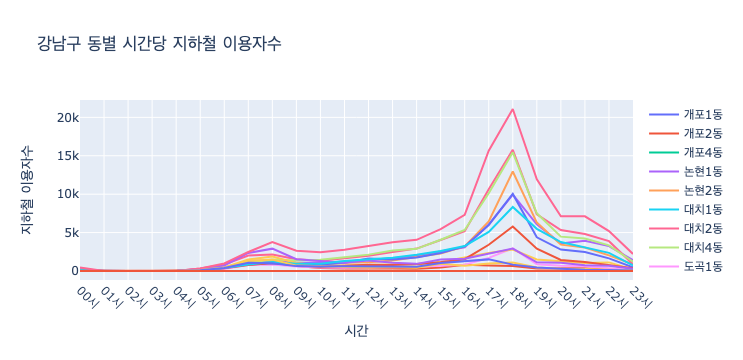

In [54]:
import plotly.graph_objects as go
fig = go.Figure()

for dong, df in grouped_df:
    fig.add_trace(go.Scatter(x = df.columns[7:], y = df.iloc[0, 7:], name = dong))
    
fig.update_layout(title = '강남구 동별 시간당 지하철 이용자수',
                  xaxis_title = '시간',
                  yaxis_title = '지하철 이용자수')
fig.update_xaxes(tickangle=45)
    
fig.show()